In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# Drop empty columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
# Drop null values
df.dropna(inplace=True)

In [8]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [9]:
# Change datatype of amount
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


***

# <span style='color:#ff4d4d'>Exploratory Data Analysis</span>

## Gender

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

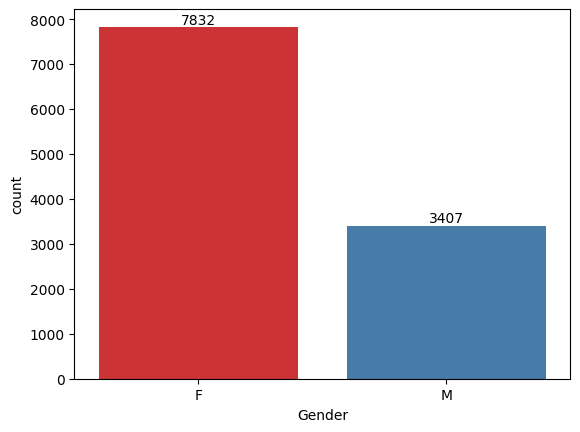

In [13]:
# Bar chart for gender and it's count

ax = sns.countplot(x = 'Gender', hue='Gender', data = df, palette = "Set1")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: ylabel='Amount'>

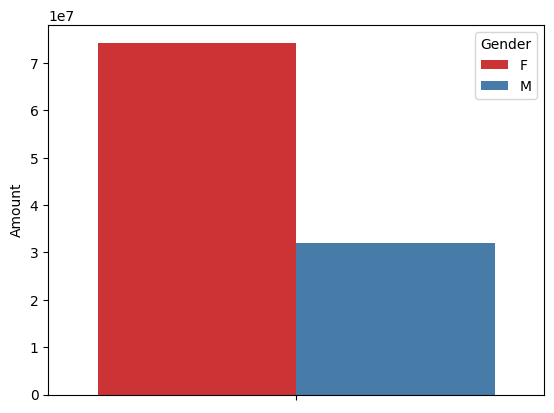

In [14]:
# Bar chart for gender and total amount

sales_general = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.barplot(y='Amount', hue='Gender', data = sales_general, palette="Set1")

##### *From above graph we can see that most of the buyers are females and even the purchasing power of females are greater than men*

## Age

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

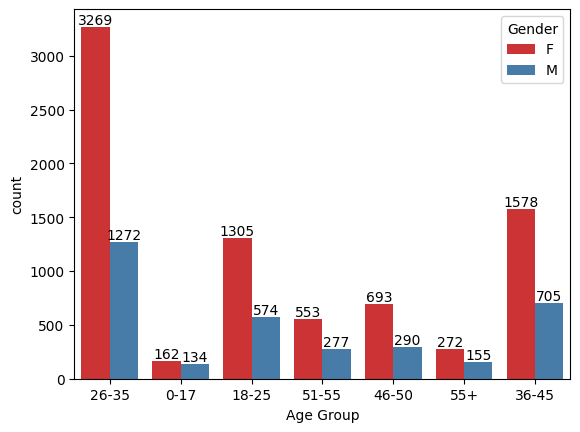

In [16]:
# Bar chart for Age group and count, on the basis of Gender

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender', palette="Set1")

for bars in ax.containers:
    ax.bar_label(bars)

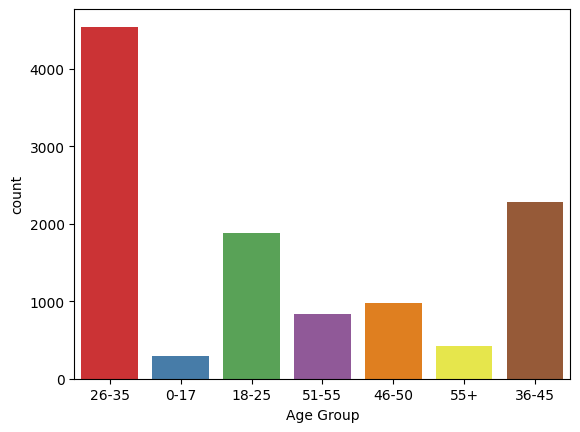

In [17]:
# Bar chart for Age froup and it's count

ax = sns.countplot(data = df, x = 'Age Group', hue = 'Age Group', palette="Set1")

##### *From above graphs we can see that most of the buyers are of age group between 26-35 years female*

## State

In [18]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<Axes: xlabel='State', ylabel='Orders'>

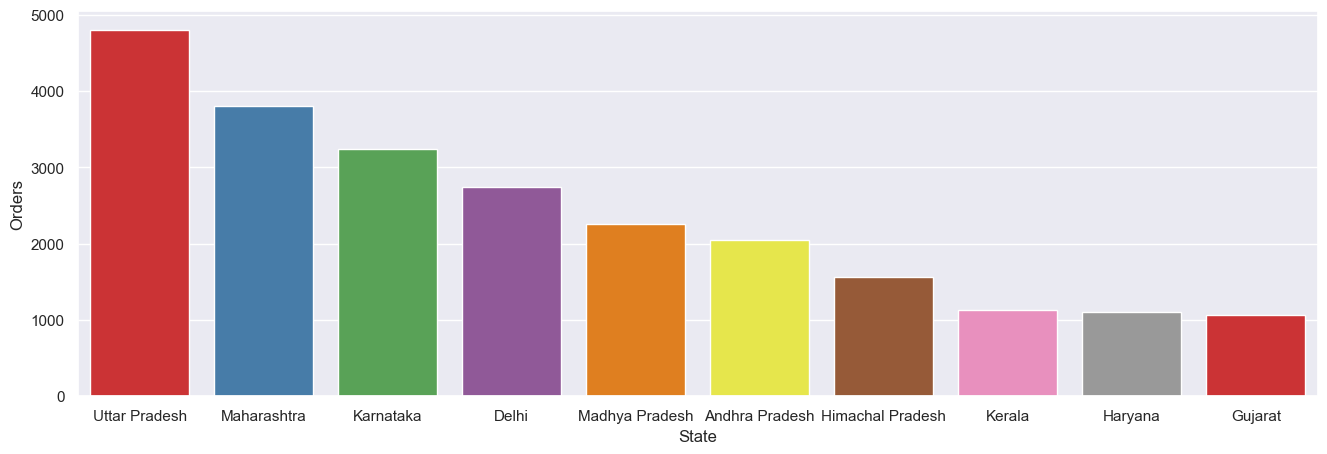

In [19]:
# Total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(
    by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot( x='State', y='Orders', hue='State', data = sales_state, palette="Set1")

<Axes: xlabel='State', ylabel='Amount'>

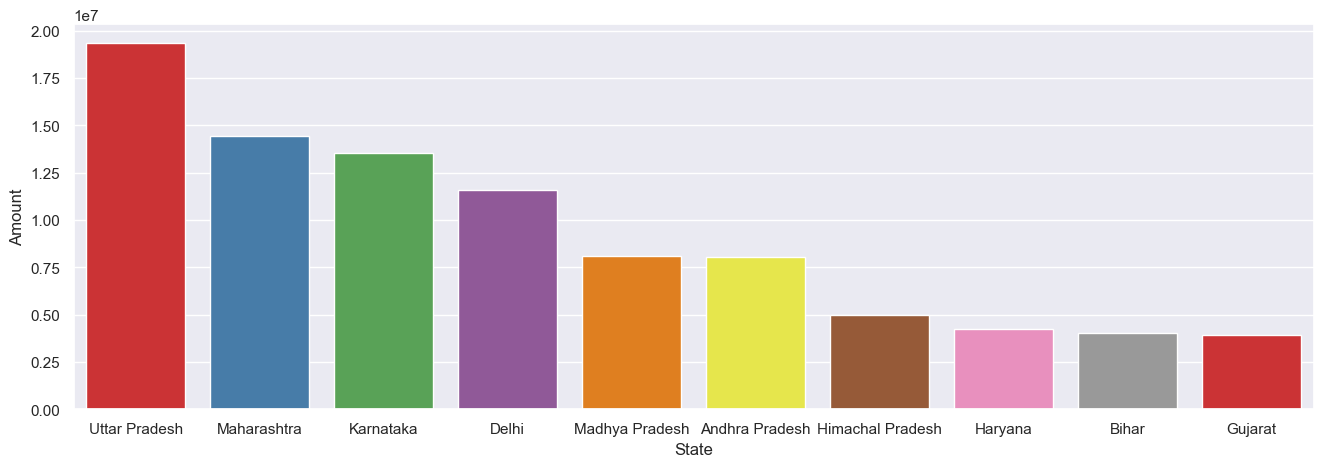

In [20]:
# Total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(
    by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State', y='Amount', hue='State', data = sales_state, palette="Set1")

##### *From above graphs we can see that most of the orders & total sales/amount are form Uttar Pradesh, Maharashtra and Karnataka respectively*

## Marital Status

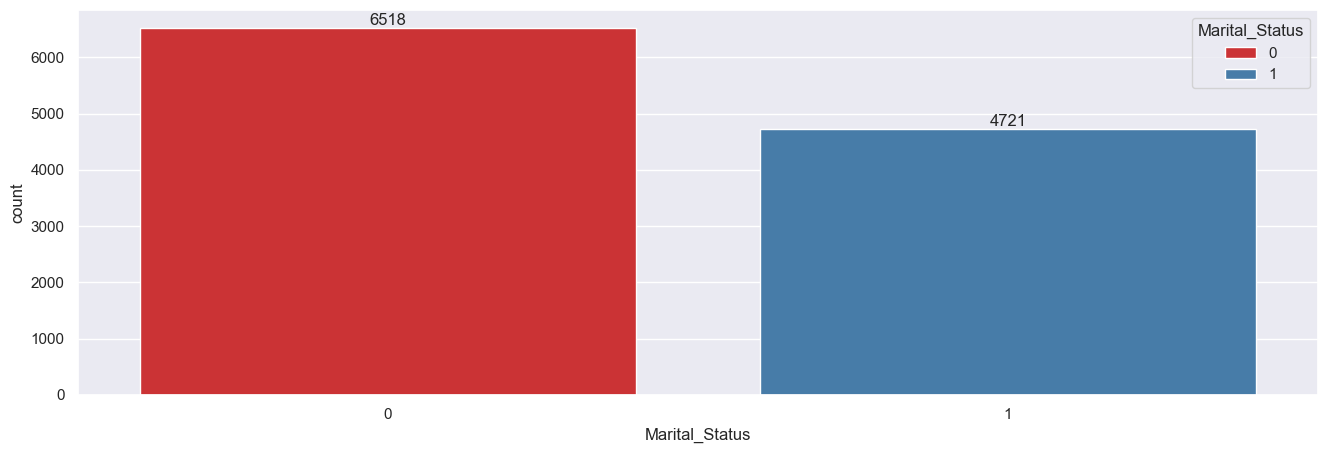

In [21]:
# Bar chart for Marital rate

ax = sns.countplot(data = df, x = 'Marital_Status', hue = 'Marital_Status', palette="Set1")

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

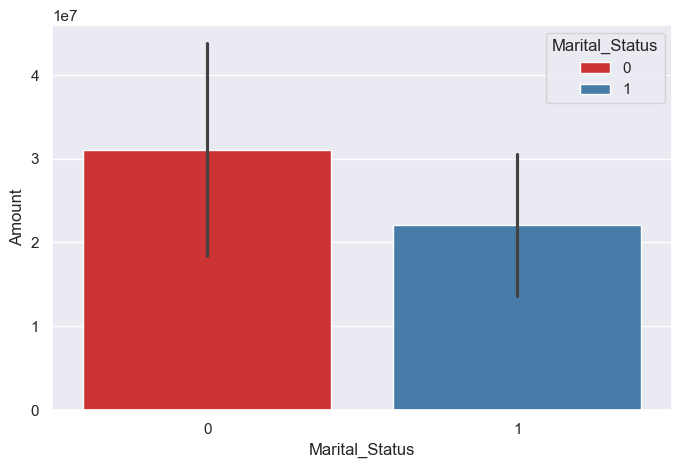

In [22]:
# Bar chart for Amount spent by married and unmarried people

sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(
    by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(8,5)})

sns.barplot(x='Marital_Status', y='Amount', hue='Marital_Status', data = sales_state, palette="Set1")

##### *From the above graph we can see that most of the buyers are married(women) and they have high purchase power*

## Occupation

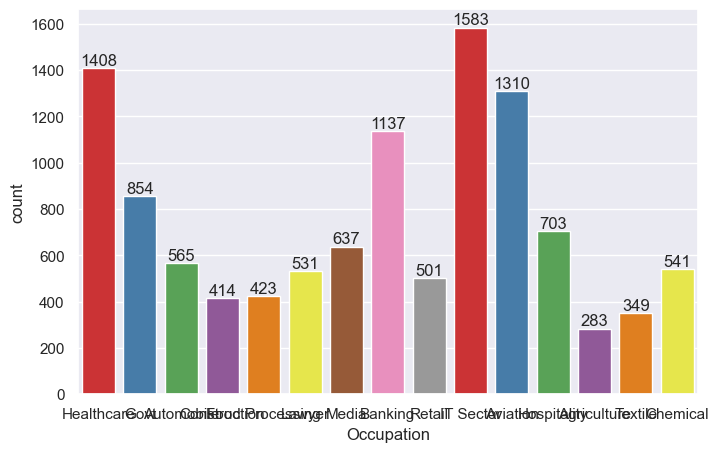

In [23]:
# Bar chart for Occupation types and count

ax = sns.countplot(data = df, x = 'Occupation', hue = 'Occupation', palette="Set1")
sns.set(rc={'figure.figsize':(22,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

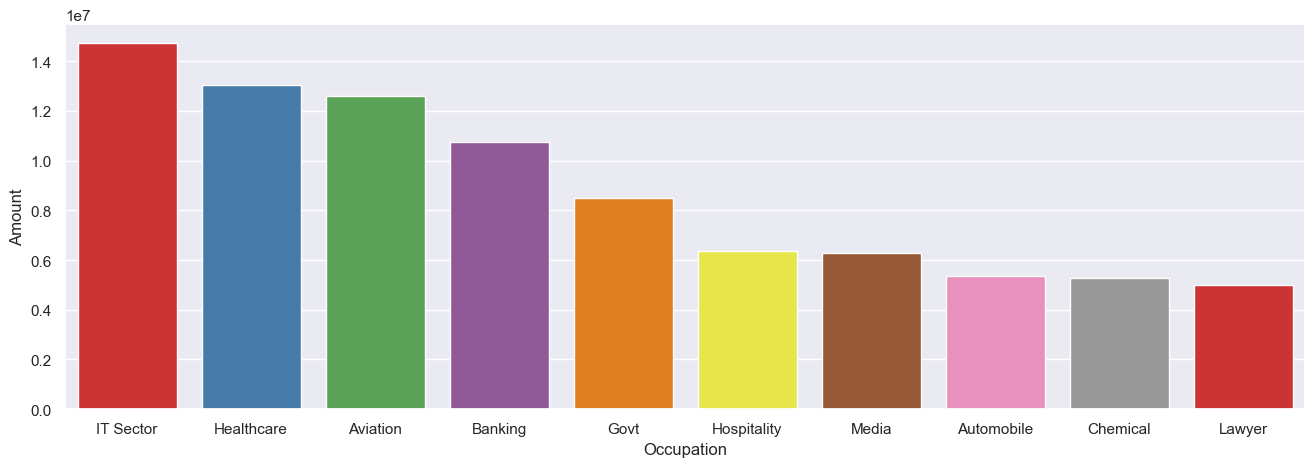

In [24]:
# Bar chart for Sales according to Occupation types

sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(
    by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})

sns.barplot(x='Occupation', y='Amount', hue='Occupation', data = sales_state, palette="Set1")

##### *From above graphs we can see that most of the buyers are working in IT, Healthcare, Aviation sector*

## Product Category

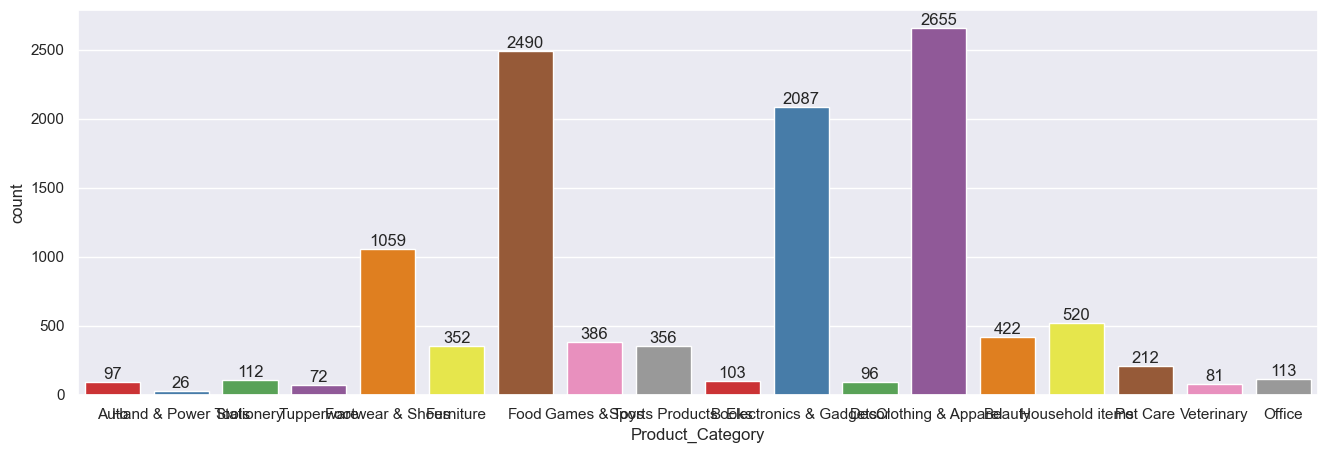

In [25]:
# Bar chart for count according to Product categories

ax = sns.countplot(data = df, x = 'Product_Category', hue = 'Product_Category', palette="Set1")
sns.set(rc={'figure.figsize':(30,8)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

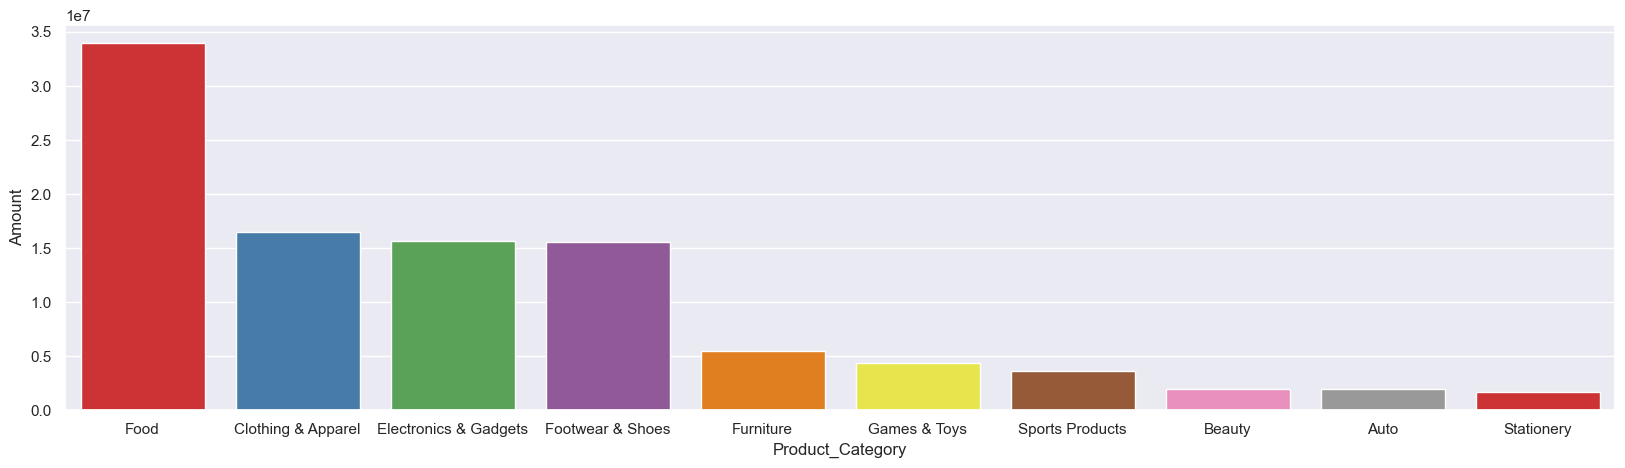

In [26]:
# Bar chart for Sales in different Product categories

sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(
    by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Product_Category', y='Amount', hue='Product_Category', data = sales_state, palette="Set1")

##### *From above graphs we can see that most of the sold products are from Food, Clothing, Electronics category*

<Axes: xlabel='Product_ID', ylabel='Amount'>

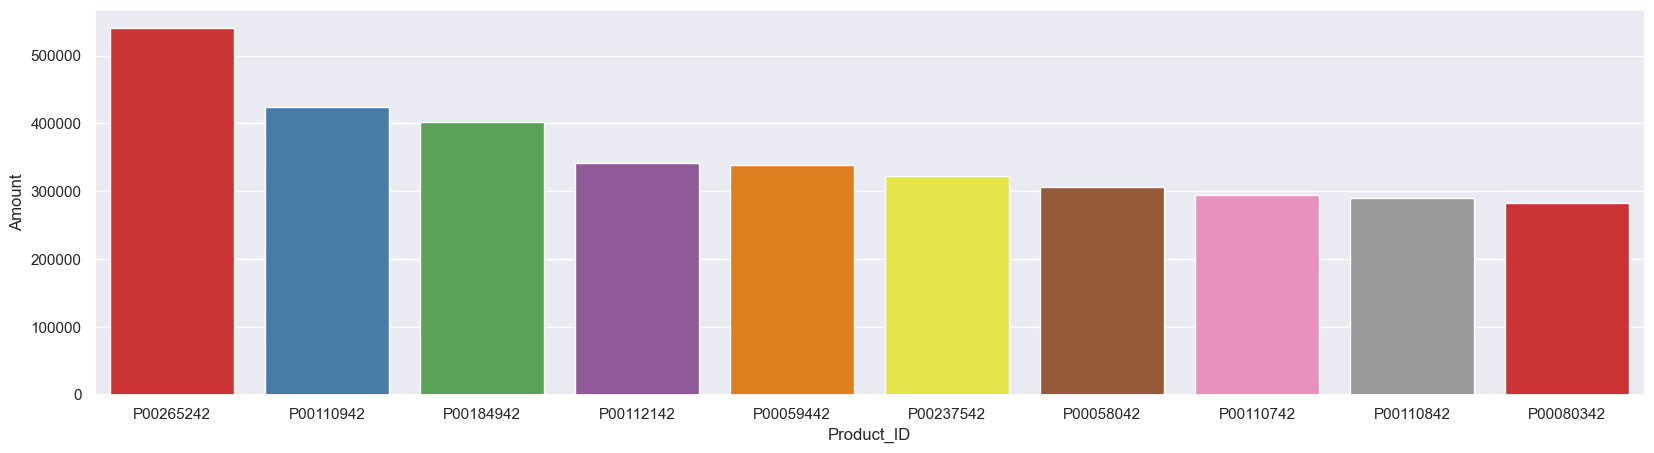

In [27]:
# Bar chart for Sales in different Product categories with Product IDs

sales_state = df.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(
    by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,5)})

sns.barplot(x='Product_ID', y='Amount', hue='Product_ID', data = sales_state, palette="Set1")

*** 
*** 

## <span style='color:cyan'>Conclusion</span>

#### *Married women of age group 26-35 years from Uttar Pradesh, Maharastra, Karnataka working in IT, Healthcare, Aviation are likely to buy products from Food, Clothing, Electronics category*